# Problem 1.4

## Exercise 3.7: The Mandelbrot set
\textbf{from Newman Computational Physics}


The Mandelbrot set, named after its discoverer, the French
mathematician Beno\^{\i}t Mandelbrot, is a \defn{fractal}, an infinitely
ramified mathematical object that contains structure within structure
within structure, as deep as we care to look.  The definition of the
Mandelbrot set is in terms of complex numbers as follows.

Consider the equation

$z' = z^2 + c$,

where $z$ is a complex number and $c$ is a complex constant.  For any given
value of $c$ this equation turns an input number~$z$ into an output
number~$z'$.  The definition of the Mandelbrot set involves the repeated
iteration of this equation: we take an initial starting value of~$z$ and
feed it into the equation to get a new value~$z'$.  Then we take that value
and feed it in again to get another value, and so forth.  The Mandelbrot
set is the set of points in the complex plane that satisfies the following
definition:

For a given complex value of~$c$, start with $z=0$ and iterate repeatedly.  If the magnitude~$|z|$ of the resulting value is ever greater than~2, then the point in the complex plane at position~$c$ is not in the Mandelbrot set, otherwise it is in the set.

In order to use this definition one would, in principle, have to iterate
infinitely many times to prove that a point is in the Mandelbrot set, since
a point is in the set only if the iteration never passes $|z|=2$ ever.  In
practice, however, one usually just performs some large number of
iterations, say 100, and if $|z|$ hasn't exceeded 2 by that point then we
call that good enough.

Write a program to make an image of the Mandelbrot set by performing the
iteration for all values of $c=x+iy$ on an $N\times N$ grid spanning the
region where $-2\le x\le 2$ and $-2\le y\le 2$.  Make a density plot in
which grid points inside the Mandelbrot set are colored black and those
outside are colored white.  The Mandelbrot set has a very distinctive shape
that looks something like a beetle with a long snout---you'll know it when
you see it.

Hint: You will probably find it useful to start off with quite a coarse
grid, i.e.,~with a small value of~$N$---perhaps $N=100$---so that your
program runs quickly while you are testing it.  Once you are sure it is
working correctly, increase the value of $N$ to produce a final
high-quality image of the shape of the set.

If you are feeling enthusiastic, here is another variant of the same
exercise that can produce amazing looking pictures.  Instead of coloring
points just black or white, color points according to the number of
iterations of the equation before $|z|$ becomes greater than~2 (or the
maximum number of iterations if $|z|$ never becomes greater than~2).  If
you use one of the more colorful color schemes Python provides for density
plots, such as the `hot` or `jet` schemes, you can make
some spectacular images this way.  Another interesting variant is to color
according to the logarithm of the number of iterations, which helps reveal
some of the finer structure outside the set.


Enter the desired number of iterations: 100


C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in square
  # This is added back by InteractiveShellApp.init_path()
C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in absolute
  del sys.path[0]
C:\Users\renep\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


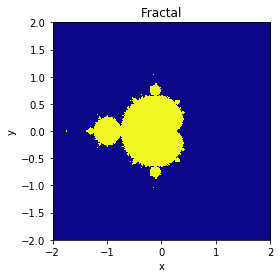

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = int(input("Enter the desired number of iterations: "))
limit = 2
x,y=np.mgrid[-limit:limit:5000j,-limit:limit:5000j]
c=x+1j*y
z=0

for n in range(N):
    z=z**2 + c

point=np.abs(z)<limit

plt.imshow(np.transpose(point),extent=[-limit,limit,-limit,limit], cmap = 'plasma')
plt.title("Fractal")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def get_iter(c:complex, thresh:int =4, max_steps:int =25) -> int:
    # Z_(n) = (Z_(n-1))^2 + c
    # Z_(0) = c
    z=c
    i=1
    while i<max_steps and (z*z.conjugate()).real<thresh:
        z=z*z +c
        i+=1
    return i

## Code by Abdul Salam
\textbf{https://levelup.gitconnected.com/mandelbrot-set-with-python-983e9fc47f56} 

In [9]:
def plotter(n, thresh, max_steps=25):
    mx = 2.48 / (n-1)
    my = 2.26 / (n-1)
    mapper = lambda x,y: (mx*x - 2, my*y - 1.13)
    img=np.full((n,n), 255)
    for x in range(n):
        for y in range(n):
            it = get_iter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps)
            img[y][x] = 255 - it
    return img

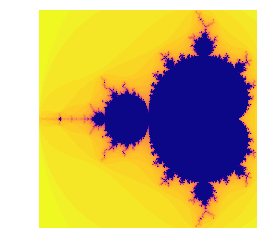

In [10]:
n=1000
img = plotter(n, thresh=4, max_steps=50)
plt.imshow(img, cmap="plasma")
plt.axis("off")
plt.show()